In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
data = np.loadtxt("data1.csv", delimiter=",")
N,n = data.shape
y = data[:,n-1]
for i in range(y.size):
    if (y[i] == -1):
        y[i] = 0
N,n

(200, 3)

In [152]:
X = data[:,0:n-1]
y = data[:,n-1]

In [153]:
classes = set(y)
classes_list_ = list(classes)
no_of_class = len(classes)

In [154]:
classes_list_

[0.0, 1.0]

In [155]:
# list of all the datapoints corresponding to each class
x_ = []
for i in range(no_of_class):
    x_.append(X[y == classes_list_[i]])
#print(x_)

In [156]:
#x_[2]

In [157]:
def mean_vectors():
    mu_vector_ = []# list for storing all the mean vectors of each column of each class
    temp_mu = []
    for i in range(no_of_class):
        for j in range(X.shape[1]):
            temp_mu.append(x_[i][:,j].mean())
        mu_vector_.append(temp_mu)
        temp_mu = []
    return np.array(mu_vector_)

In [158]:
mu_vector_ = mean_vectors()
mu_vector_[1]

array([14.95, 34.32])

In [159]:
N,n = X.shape
N,n

(200, 2)

In [160]:
def covariance_matrix():
    N,n = X.shape
    cov_mat = np.zeros((n,n))
    for i in range(no_of_class):
        for j in range(x_[i].shape[0]):
            cov_mat = cov_mat + np.outer( x_[i][j] - mu_vector_[i], (x_[i][j] - mu_vector_[i]).T )
            
    return cov_mat/N 

In [161]:
cov = covariance_matrix()
cov_inv = np.linalg.inv(cov)
cov_det = np.linalg.det(cov)
print(cov_det)
print(cov)

14126.725865822536
[[110.63495  60.8828 ]
 [ 60.8828  161.19175]]


In [162]:
def probability_y():
    prob_y_ = []
    actual_y_lst = list(y)
    for i in range(len(classes_list_)) :
        #actual_y_lst = list(y)
        prob_y_.append( (actual_y_lst.count(classes_list_[i])) / len(actual_y_lst) )
    return prob_y_

In [163]:
prob_y_ = probability_y()
prob_y_

[0.5, 0.5]

In [164]:
x_[1][88]

array([38., 44.])

In [165]:
def predict_y(): # to get the predicted y vector
    pred = []
    for i in range(X.shape[0]):
        tst = []
        for j in range(no_of_class):
            a = np.log(prob_y_[j]) - 0.5 * (np.dot( np.dot((mu_vector_[j]).T,cov_inv),mu_vector_[j] ) ) 
            b = a + np.dot(np.dot(X[i].T,cov_inv),mu_vector_[j])
            tst.append(b)
        d = max(tst)
        f = tst.index(d)
        pred.append(classes_list_[f])
    
    return np.array(pred)

In [166]:
predicted_y = predict_y()
predicted_y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

In [167]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [168]:
def accuracy():
    correct_prediction = 0
    for i in range(y.shape[0]):
        if (predicted_y[i] == y[i]):
            correct_prediction += 1
    
    per = (correct_prediction *100) / y.size
    print(per)

In [169]:
acc = accuracy()

95.5


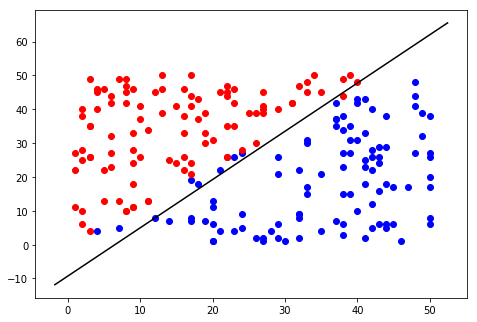

In [170]:
w = np.dot(cov_inv,mu_vector_[1] - mu_vector_[0]).reshape(n,1)
l = -0.5*np.dot(np.dot(mu_vector_[1].T,cov_inv),mu_vector_[1])
m = 0.5*np.dot(np.dot(mu_vector_[0].T,cov_inv),mu_vector_[0])
n = np.log(prob_y_[1] / prob_y_[0])
w0 = l + m + n
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')

x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * w[0] + w0)/w[1]


ax.plot(x_vals,y_vals,color="black")